<a href="https://colab.research.google.com/github/Ludvins/PAC_Bayes_Chernoff_MLL/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau
from google.colab import files
import pandas as pd
import os

In [ ]:
uploaded = files.upload()


Saving laplace_ConvNN_last_layer_kron_scalar_0.01_results (4).csv to laplace_ConvNN_last_layer_kron_scalar_0.01_results (4).csv
Saving laplace_ConvNN_last_layer_kron_scalar_100.0_results (4).csv to laplace_ConvNN_last_layer_kron_scalar_100.0_results (4).csv
Saving laplace_ConvNN_last_layer_kron_scalar_10.0_results (2).csv to laplace_ConvNN_last_layer_kron_scalar_10.0_results (2).csv
Saving laplace_ConvNN_last_layer_kron_scalar_0.0_results (5).csv to laplace_ConvNN_last_layer_kron_scalar_0.0_results (5).csv
Saving laplace_ConvNN_last_layer_kron_scalar_0.1_results (2).csv to laplace_ConvNN_last_layer_kron_scalar_0.1_results (2).csv


[link text](https://)

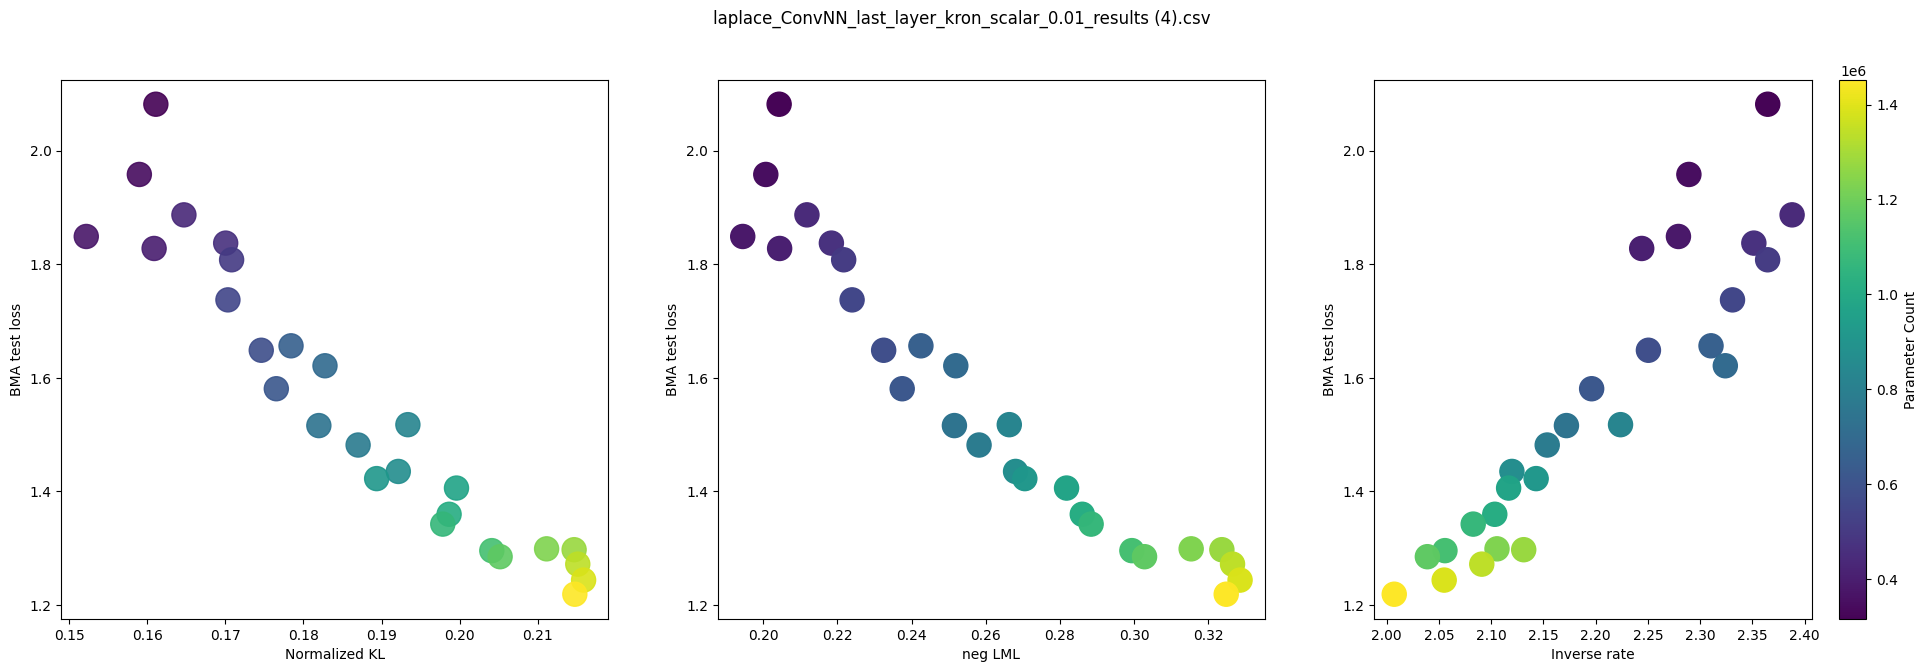

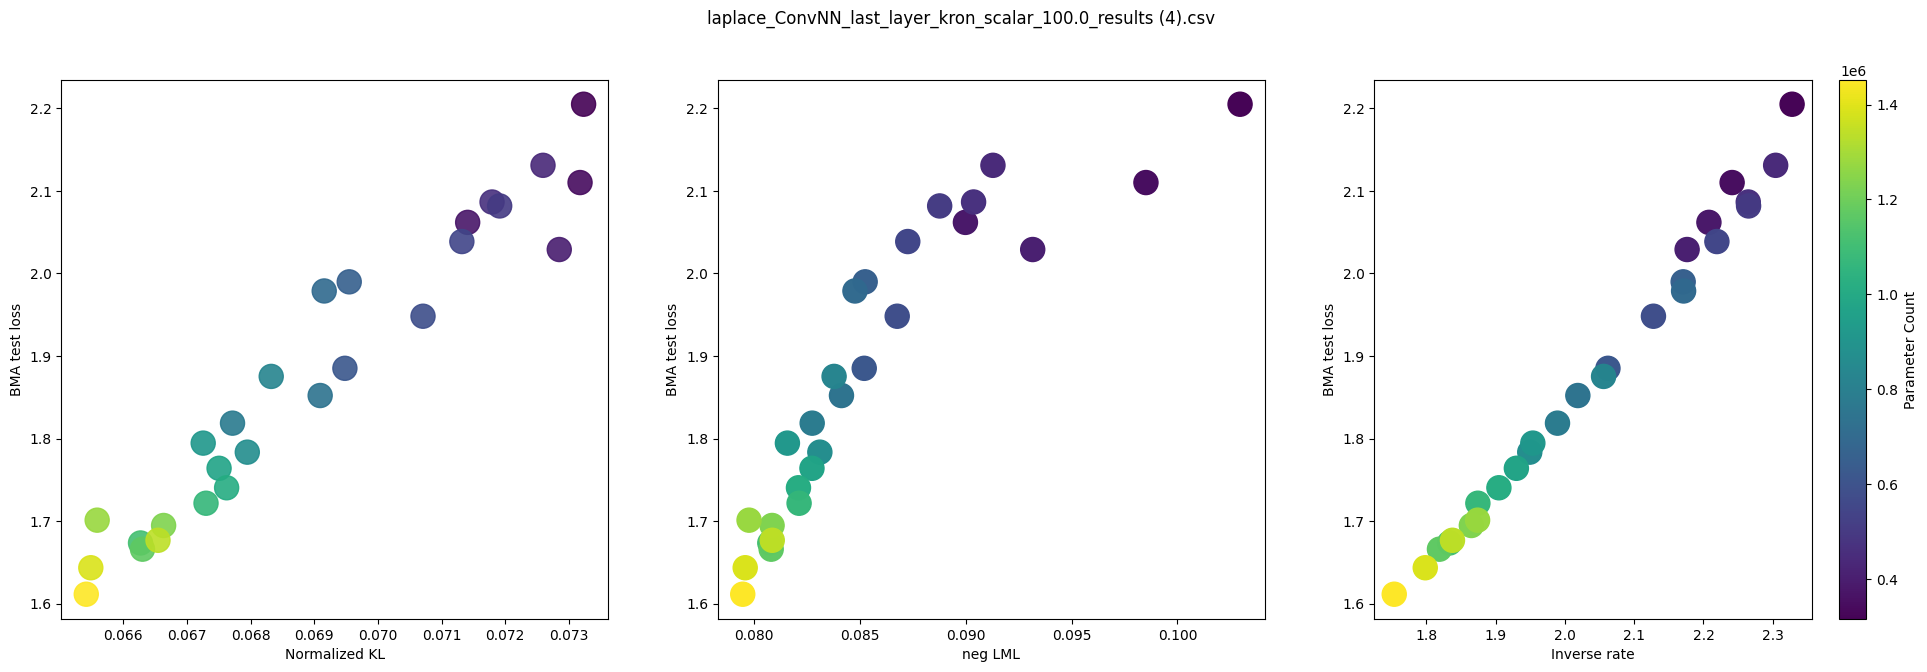

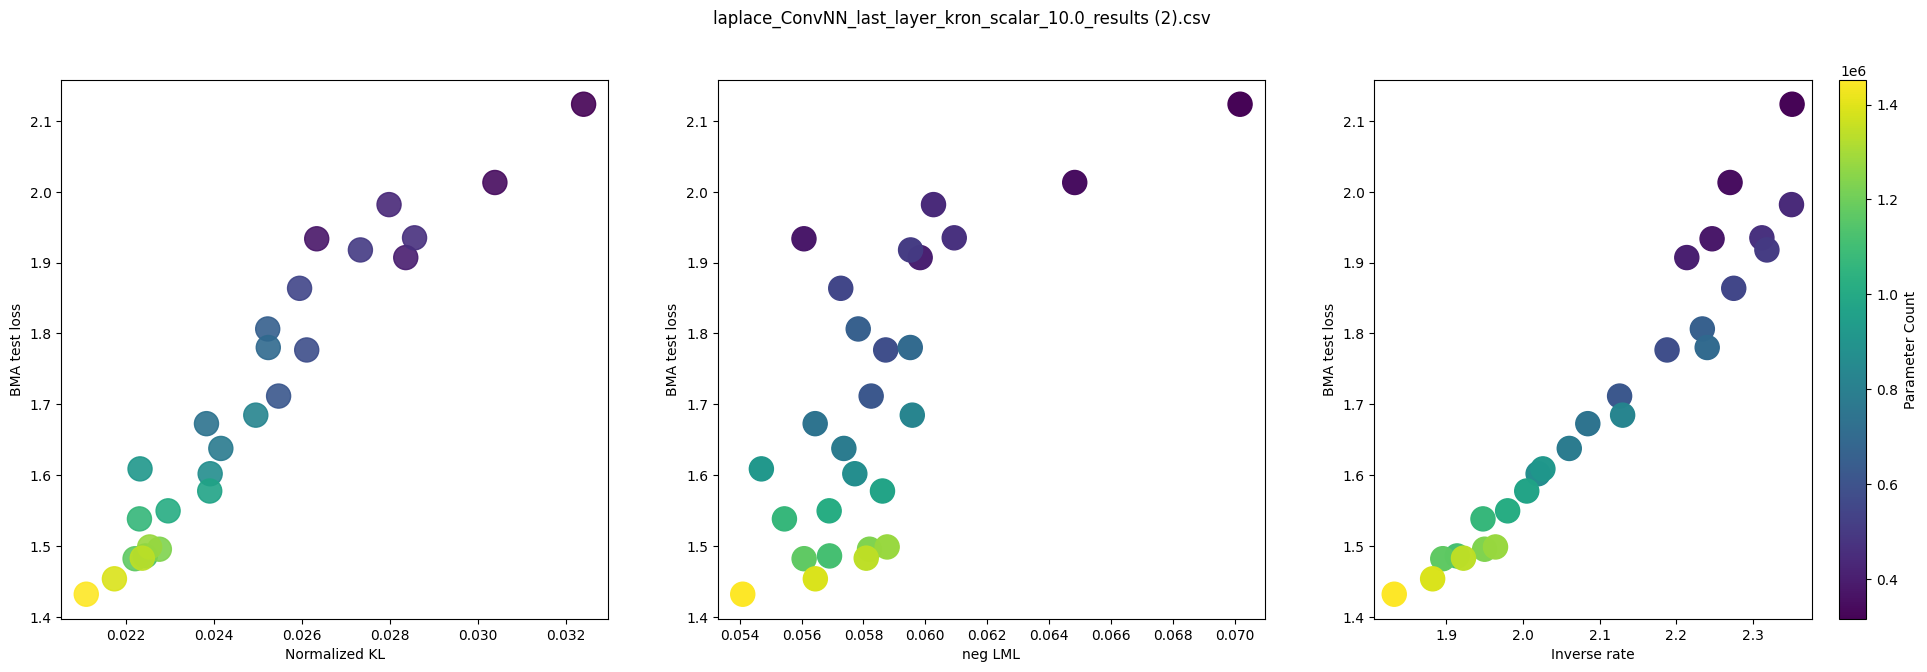

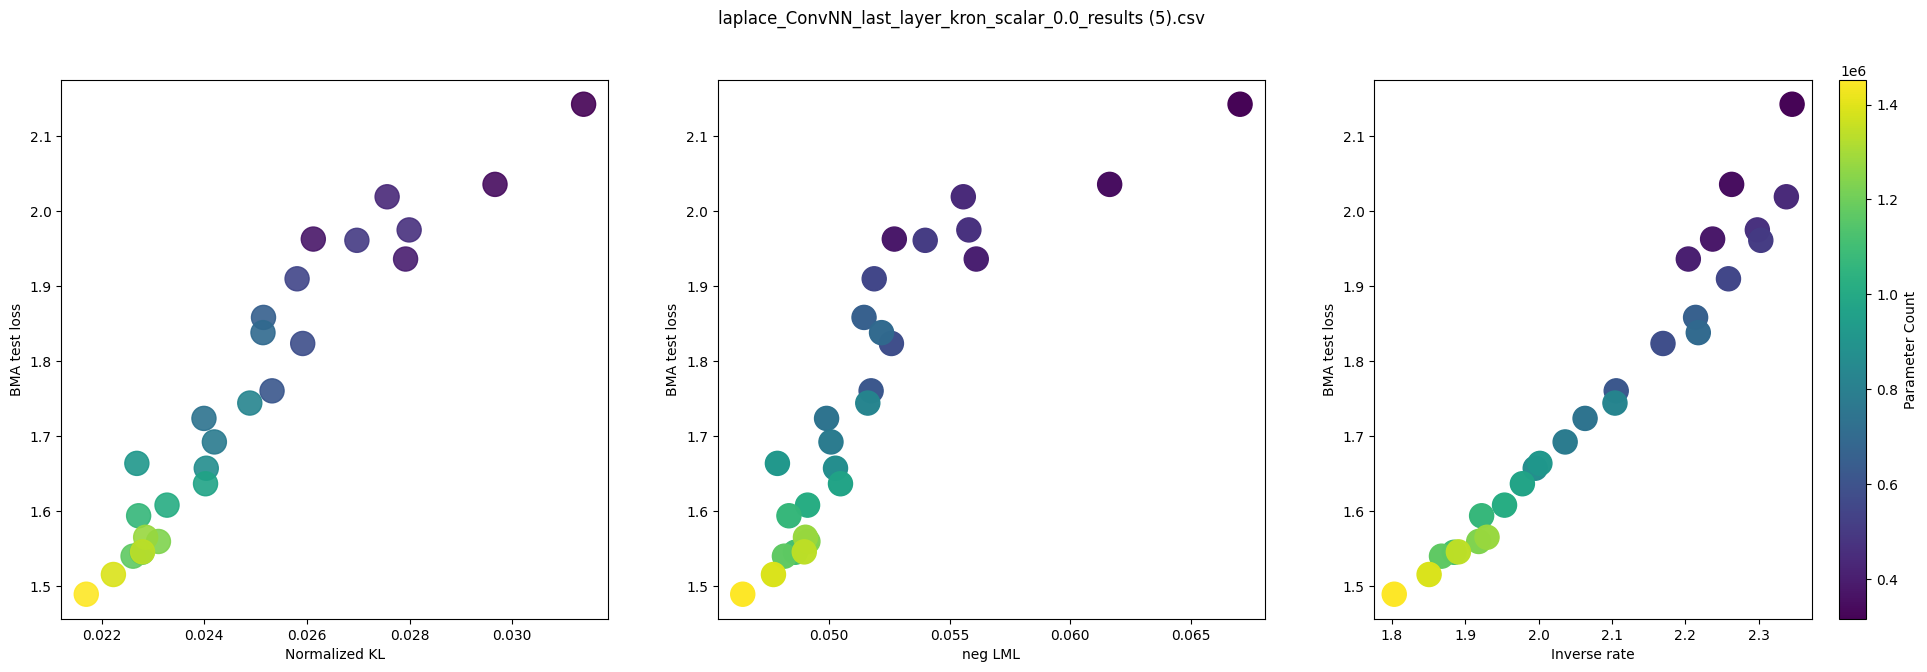

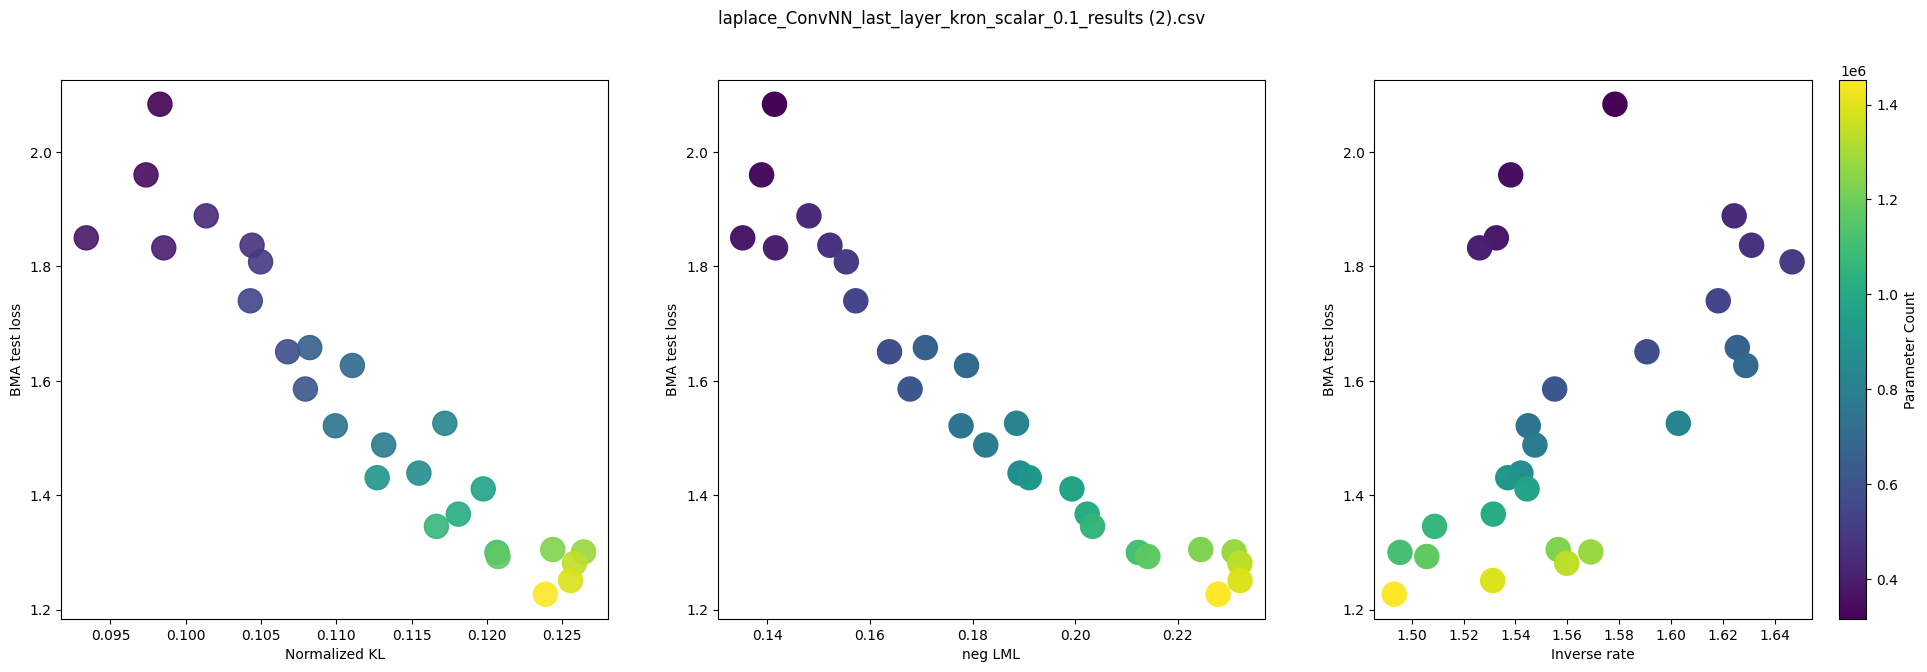

In [ ]:
x = 21

for name in uploaded:
    df = pd.read_csv(name)

    bma_test_accuracy = df['BMA test accuracy (%)'].values
    bayes_loss = df['bayes loss'].values
    gibbs_loss = df ['gibbs loss'].values
    bayes_loss_train = df['bayes loss train'].values
    gibbs_loss_train = df['gibbs loss train'].values
    neg_log_marginal = df['neg log marginal'].values
    neg_log_marginal_laplace = df['neg log marginal laplace'].values
    normalized_kl = df['normalized KL'].values
    inverse_rate = df['inverse rate'].values
    variance = df['variance'].values
    parameters = df['parameters'].values
    gen_gap = gibbs_loss - gibbs_loss_train
    bayes_gen_gap = bayes_loss - bayes_loss_train


    fig, ax1 = plt.subplots(1, 3, figsize=(24, 7))


    scatter = ax1[0].scatter(normalized_kl[x:], bayes_loss[x:], c=parameters[x:], cmap='viridis', s=300, alpha=0.9)
    ax1[0].set_xlabel('Normalized KL')
    ax1[0].set_ylabel('BMA test loss')

    #tau, p_value = kendalltau(normalized_kl[x:], bayes_loss[x:])
    #ax1[0].text(0.15, 0.15, f'Kendall tau: {tau:.2f}\n P-value: {p_value:.5f}',
    #            transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    scatter = ax1[1].scatter(neg_log_marginal[x:], bayes_loss[x:], c=parameters[x:], cmap='viridis', s=300, alpha=0.99)
    ax1[1].set_xlabel('neg LML')
    ax1[1].set_ylabel('BMA test loss')

    #tau, p_value = kendalltau(neg_log_marginal[x:], bayes_loss[x:])
    #ax1[1].text(0.15, 0.15, f'Kendall tau: {tau:.2f}\n P-value: {p_value:.5f}',
    #            transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


    scatter = ax1[2].scatter(inverse_rate[x:], bayes_loss[x:], c=parameters[x:], cmap='viridis', s=300, alpha=0.99)
    ax1[2].set_xlabel('Inverse rate')
    ax1[2].set_ylabel('BMA test loss')

    #tau, p_value = kendalltau(inverse_rate[x:] + gibbs_loss_train[x:], bayes_loss[x:])
    #ax1[2].text(2.67, 0.15, f'Kendall tau: {tau:.2f}\n P-value: {p_value:.5f}',
    #            transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    cbar = plt.colorbar(scatter, ax=ax1[2])
    cbar.set_label('Parameter Count')

    fig.suptitle(name)
    #fig.tight_layout()
    plt.show()


In [ ]:
uploaded = files.upload()

Saving ConvNN_train_results.csv to ConvNN_train_results.csv


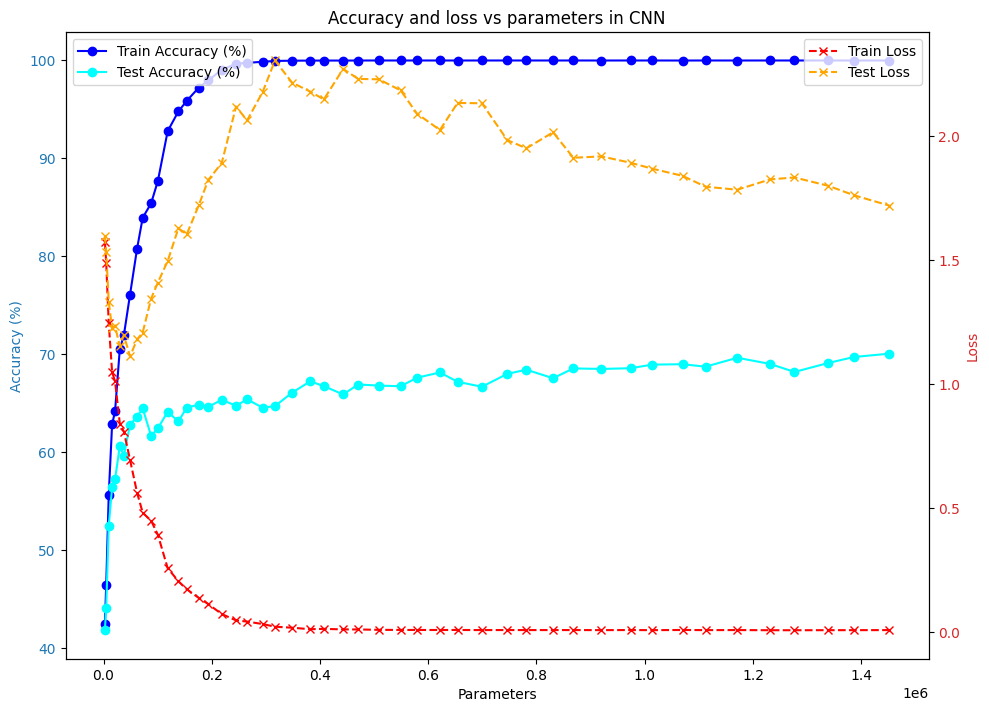

In [ ]:
for name in uploaded:
  df = pd.read_csv(name)

  train_accuracy = df['train accuracy (%)'].values
  test_accuracy = df['test accuracy (%)'].values
  train_loss = df['train loss'].values
  test_loss = df['test loss'].values
  parameters = df['parameters'].values

  # Plot train/test accuracy and train/test loss again
  fig, ax1 = plt.subplots(figsize=(10, 7))

  color = 'tab:blue'
  ax1.set_xlabel('Parameters')
  ax1.set_ylabel('Accuracy (%)', color=color)
  ax1.plot(parameters, train_accuracy, label='Train Accuracy (%)', color='blue', marker='o')
  ax1.plot(parameters, test_accuracy, label='Test Accuracy (%)', color='cyan', marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:red'
  ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
  ax2.plot(parameters, train_loss, label='Train Loss', color='red', linestyle='--', marker='x')
  ax2.plot(parameters, test_loss, label='Test Loss', color='orange', linestyle='--', marker='x')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('Accuracy and loss vs parameters in CNN')
  plt.show()